# Morphological Assignments

I Gede Teguh Satya Dharma

__NIM__ 21/485591/PPA/06217

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import math
from copy import deepcopy
import cv2

# Structuring Elements

In [60]:
def generate_SE(se_type='rect', kernel_size=(5,5)):
    se = np.ones((kernel_size[1], kernel_size[0]), dtype='uint8')
    zeros_row = np.zeros(kernel_size[0], dtype='uint8')
    mid_row_index = math.floor(kernel_size[0]/2)
    zeros_row[mid_row_index] = 1
    
    if se_type == 'rect':
        se = np.ones(kernel_size, dtype='uint8')
        
    elif se_type == 'cross':
        mid_col_index = math.floor(kernel_size[1]/2)
        for i in range(0, len(se)):
            if i == mid_col_index:
                continue
            else:
                se[i] = zeros_row
                
    elif se_type == 'ellipse':
        for i in range(0, len(se)):
            if i == 0 or i == len(se)-1:
                se[i] = zeros_row
            else:
                se[i] = np.ones(kernel_size[0], dtype='uint8')
    
    elif se_type == 'horizontal':
        mid_col_index = math.floor(kernel_size[1]/2)
        for i in range(0, len(se)):
            if i == mid_col_index:
                continue
            else:
                se[i] = np.zeros(kernel_size[0], dtype='uint8')
        
        
        
    return se        

# Morphological Operator

In [61]:
def put_padding(img, se):
    n_layers = int((se.shape[0]-1)/2)
    padded = np.pad(img, (n_layers, n_layers), 'constant', constant_values=0)
    return padded

def dilate(img, se):
    dilated = np.zeros_like(img, dtype='uint8')
    padded_img = put_padding(img, se)    
    for i in range(0, len(img)): # convolution
        for j in range(0, len(img)):
            kernel_window = padded_img[i:i+se.shape[0], j:j+se.shape[1]]
            matches = np.logical_and(kernel_window, se)
            if np.count_nonzero(matches) > 0:
                dilated[i, j] = 1
            else:
                dilated[i, j] = 0
    
                
    return dilated

def erode(img, se):
    eroded = np.zeros_like(img, dtype='uint8')
    padded_img = put_padding(img, se)    
    for i in range(0, len(img)): # convolution
        for j in range(0, len(img)):
            kernel_window = padded_img[i:i+se.shape[0], j:j+se.shape[0]]
            matches = np.logical_and(kernel_window, se)
            if np.count_nonzero(matches) == np.count_nonzero(se):
                eroded[i, j] = 1
            else:
                eroded[i, j] = 0
                
    return eroded


def opening(img, se):
    eroded = erode(img, se)
    opened = dilate(eroded, se)
    return opened

def closing(img, se):
    dilated = dilate(img, se)
    closed = erode(dilated, se)
    return closed

# Uji dengan _Dummy Data_

## Structuring Element (SE) Demo

In [62]:
rect_se = generate_SE('rect', (3,3))

In [63]:
print(rect_se)

[[1 1 1]
 [1 1 1]
 [1 1 1]]


In [64]:
cross_se = generate_SE('cross', (5,5))

In [65]:
print(cross_se)

[[0 0 1 0 0]
 [0 0 1 0 0]
 [1 1 1 1 1]
 [0 0 1 0 0]
 [0 0 1 0 0]]


In [66]:
ellipse_se = generate_SE('ellipse', (5,5))

In [67]:
print(ellipse_se)

[[0 0 1 0 0]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [0 0 1 0 0]]


In [68]:
horizontal_se = generate_SE('horizontal', (5,5))

In [69]:
print(horizontal_se)

[[0 0 0 0 0]
 [0 0 0 0 0]
 [1 1 1 1 1]
 [0 0 0 0 0]
 [0 0 0 0 0]]


## Morphological Operations Demo

In [70]:
sample_image = np.array([
    [0, 0, 0, 0, 0],
    [0, 1, 1, 1, 0],
    [0, 1, 1, 1, 0],
    [0, 1, 1, 1, 0],
    [0, 0, 0, 0, 0],
], dtype='uint8')

### Dilation

In [71]:
smp_img = deepcopy(sample_image)

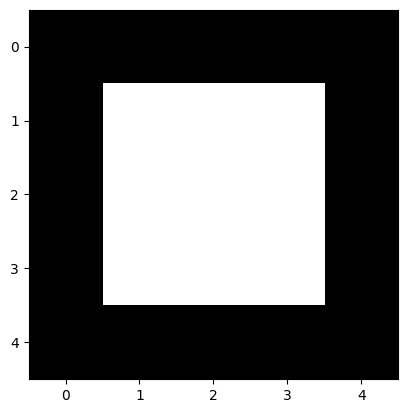

In [72]:
plt.imshow(smp_img, 'gray')

In [73]:
new_rect = generate_SE('rect', (3,3))

In [74]:
dilation = dilate(smp_img, rect_se)

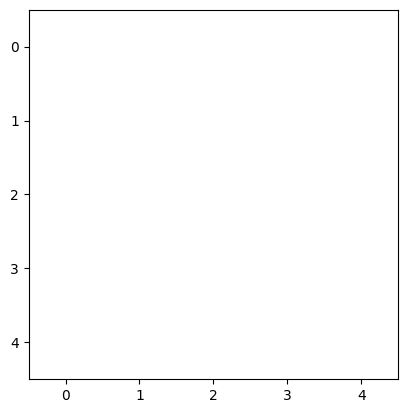

In [75]:
plt.imshow(dilation, 'gray', vmin=0, vmax=1)

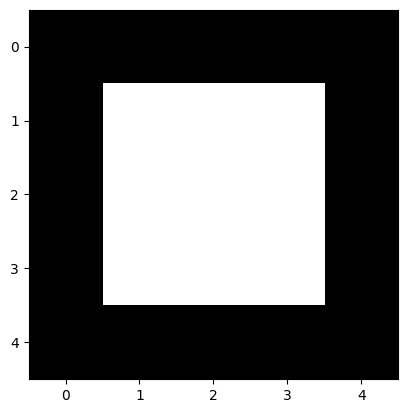

In [76]:
smp_img = deepcopy(sample_image)
plt.imshow(smp_img, 'gray', vmin=0, vmax=1)

In [77]:
new_hrzn = generate_SE('horizontal', (3,3))
dilation_hrzn = dilate(smp_img, new_hrzn)

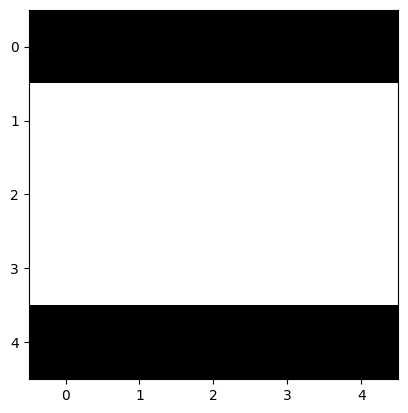

In [78]:
plt.imshow(dilation_hrzn, 'gray', vmin=0, vmax=1)

In [79]:
smp_img = deepcopy(sample_image)
new_cross = generate_SE('cross', (3,3))
dilation_cross = dilate(smp_img, new_cross)

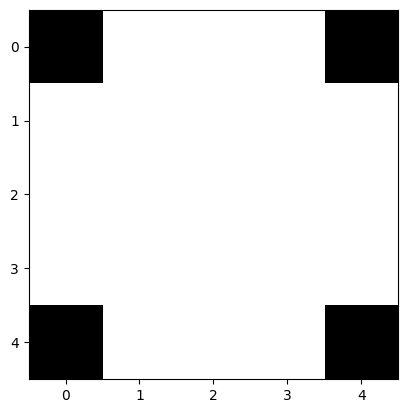

In [80]:
plt.imshow(dilation_cross, 'gray', vmin=0, vmax=1)

### Erosion

In [81]:
smp_img = deepcopy(sample_image)

In [82]:
erode_cross = generate_SE('cross', (3,3))

In [83]:
eroded = erode(smp_img, erode_cross)

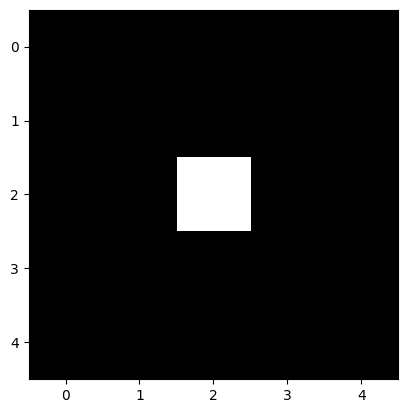

In [84]:
plt.imshow(eroded, 'gray', vmin=0, vmax=1)

In [85]:
smp_img = deepcopy(sample_image)
erode_rect = generate_SE('horizontal', (3,3))
eroded = erode(smp_img, erode_rect)

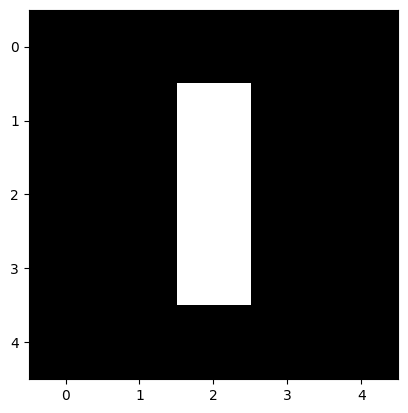

In [86]:
plt.imshow(eroded, 'gray', vmin=0, vmax=1)

### Opening

In [87]:
sample_image = np.array([
    [1, 0, 0, 0, 1],
    [1, 1, 1, 0, 1],
    [1, 1, 1, 1, 0],
    [1, 1, 1, 0, 0],
    [0, 0, 0, 0, 1],
], dtype='uint8')

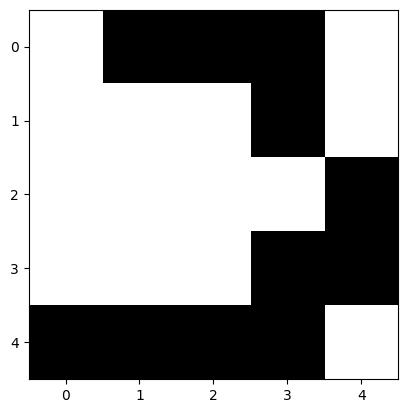

In [88]:
plt.imshow(sample_image, 'gray')

In [89]:
smp_img = deepcopy(sample_image)
rect_k = generate_SE('rect', (3,3))
open_morph = opening(smp_img, rect_k)

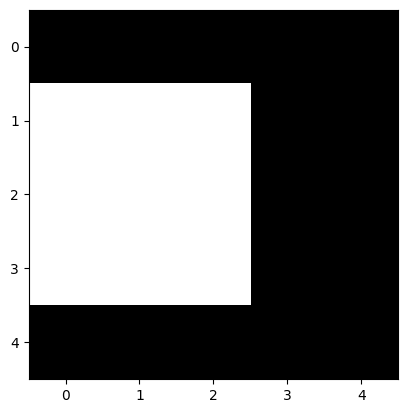

In [90]:
plt.imshow(open_morph, 'gray', vmin=0, vmax=1)

### Closing

In [91]:
sample_image = np.array([
    [0, 0, 0, 0, 0],
    [0, 1, 1, 1, 0],
    [0, 1, 0, 1, 0],
    [0, 1, 1, 1, 0],
    [0, 0, 0, 0, 0],
], dtype='uint8')

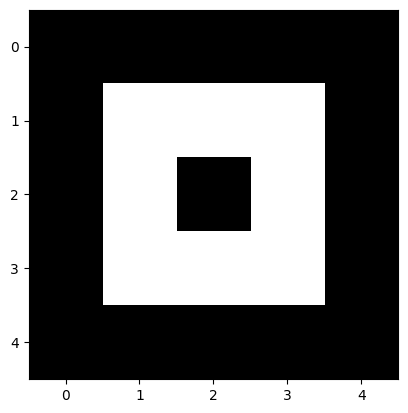

In [92]:
plt.imshow(sample_image, 'gray')

In [93]:
smp_img = deepcopy(sample_image)
rect_k = generate_SE('rect', (3,3))
open_morph = closing(smp_img, rect_k)

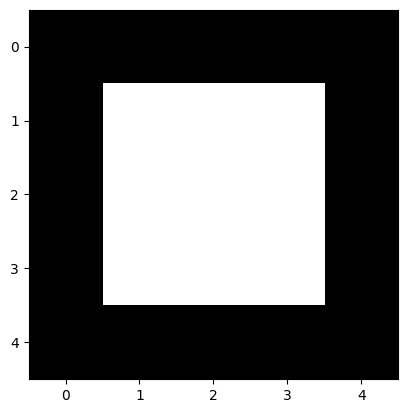

In [94]:
plt.imshow(open_morph, 'gray', vmin=0, vmax=1)

# Uji dengan Studi Kasus

Studi kasus yang digunakan untuk menguji implementasi dari operasi morfologi adalah _post processing_ segmentasi huruf.

In [95]:
gray_img = cv2.imread('../PACD/assets/pacd512.png', 0)

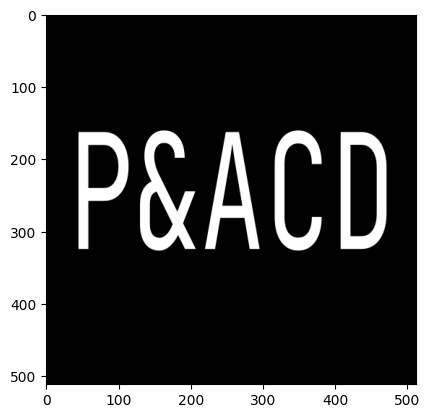

In [96]:
plt.imshow(gray_img, 'gray')

In [97]:
gray_img.shape

(512, 512)

In [98]:
gr_img = deepcopy(gray_img) # agar tidak mempengaruhi citra awal

In [99]:
gr_img.max()

255

In [100]:
threshold = 127
binaries = (gr_img > threshold) * 255

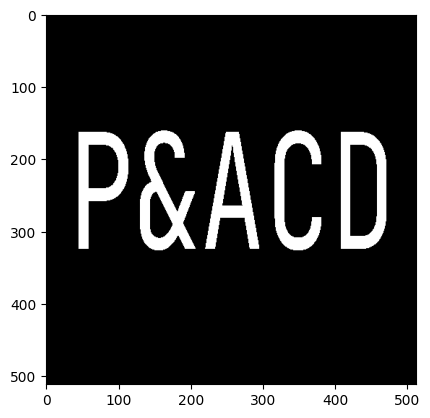

In [101]:
plt.imshow(binaries, 'gray')

## Dilation

In [102]:
bi_copy = deepcopy(binaries) # agar tidak mempengaruhi citra awal

In [103]:
rect_kernel = generate_SE('rect', (15,15))

In [104]:
dilation = dilate(bi_copy, rect_kernel)

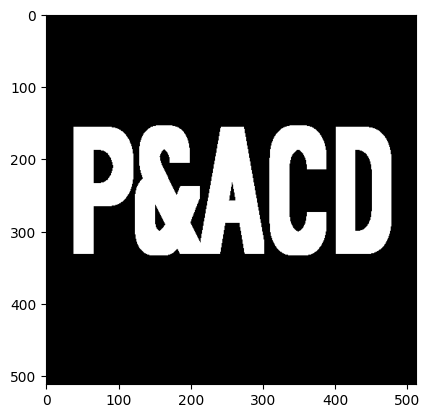

In [105]:
plt.imshow(dilation, 'gray')

In [106]:
erosion = erode(bi_copy, rect_kernel)

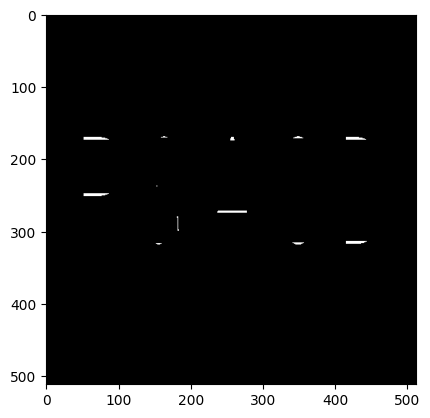

In [107]:
plt.imshow(erosion, 'gray')